In this notebook we find the equilibrium state of two skyrmion strings in a Co8Zn9Mn3 film at different magnetic field magnitudes, with the field oriented along the film width. This process is repeated using skyrmion strings separated at increasing distances, starting from two tubes close together at the centre of the sample.

For the analysis we compute the `mz` average across the film thickness for every simulation.

The DMI value for these simulations is set to 0.6 mJ / m^2, with a helical length of 120 nm.

# Imports

In [1]:
import numpy as np
import oommfpy as op
import matplotlib.pyplot as plt
from pathlib import Path
import re

import matplotlib.patheffects as PathEffects

# Parameters

In [2]:
Ms = 4.60545e5
A = 7.875e-12
# A = 6e-12
D = 0.6e-3
LD = 4 * np.pi * A / D

# Separation of tubes

In [3]:
!head ../sims/mumax3/two_tubes_separation_Co8Zn9Mn3/two_tubes_D_0d6e-3_A_5d7295e-12_LD_120nm.out/table.txt

# t (s)	mx ()	my ()	mz ()	E_total (J)	B_extx (T)	B_exty (T)	B_extz (T)	E_exch (J)	maxTorque (T)	SkSep (% of Lx)
0	2.8383163e-13	-0.97820127	0.09666031	-1.7831562e-15	0	-0.07999998	0	-2.0463411e-16	2.567102	0.05
5.001997685063523e-10	-1.0636716e-05	-0.58255965	0.00087440613	-5.195924e-15	0	-0.07999998	0	-2.414563e-15	0.01863339	0.05
1.0013378706700132e-09	0.0002563998	-0.5672972	0.0012613519	-5.252644e-15	0	-0.07999998	0	-2.5033902e-15	0.09055613	0.05
1.5003978674477226e-09	-0.00087066635	-0.55243826	0.0018211078	-5.3563513e-15	0	-0.07999998	0	-2.6421596e-15	0.061533686	0.05
2.000153215572472e-09	-0.001156213	-0.5357519	0.0021156291	-5.445992e-15	0	-0.07999998	0	-2.7766727e-15	0.037249934	0.05
2.50130073703123e-09	-0.0011515934	-0.5268274	0.0021152352	-5.475009e-15	0	-0.07999998	0	-2.8330675e-15	0.02289901	0.05
3e-09	-0.0015958329	-0.52402204	0.0021131278	-5.4808847e-15	0	-0.07999998	0	-2.8479818e-15	0.0051594703	0.05
3e-09	-0.008097232	-0.52382547	0.0014613961	-5.4899555e-15	0	-0.07999

In [4]:
ENERGY_FILE = Path('../sims/mumax3/two_tubes_separation_Co8Zn9Mn3/conical_D_0d6e-3_A_5d7295e-12_LD_120nm.out/table.txt')
# energyd = np.loadtxt(ENERGY_FILE)

# with open(ENERGY_FILE, 'r') as F:
#     header = F.readline().lstrip('# ')
#     # print(header)
# header = re.findall(r'(?:^|(?<=[\t\)]))[a-zA-Z_\( ]+(?=\()', header)
# header = [txt.rstrip() for txt in header]
# print('Headers:', header)

# energy_conicalbg = {}
# for h, hdr in enumerate(header):
#     energy_conicalbg[hdr] = energyd[:, h]
    
# final_step = energy_conicalbg['maxTorque'] < 1e-5
# for h, hdr in enumerate(header):
#     energy_conicalbg[hdr] = energy_conicalbg[hdr][final_step]

In [1]:
# energy_conicalbg

In [6]:
ENERGY_FILE = Path('../sims/mumax3/two_tubes_separation_Co8Zn9Mn3/two_tubes_D_0d6e-3_A_5d7295e-12_LD_120nm.out/table.txt')
energyd = np.loadtxt(ENERGY_FILE)

with open(ENERGY_FILE, 'r') as F:
    header = F.readline().lstrip('# ')
    # print(header)
header = re.findall(r'(?:^|(?<=[\t\)]))[a-zA-Z_\( ]+(?=\()', header)
header = [txt.rstrip() for txt in header]
print('Headers:', header)

energy_data = {}
for h, hdr in enumerate(header):
    energy_data[hdr] = energyd[:, h]

Headers: ['t', 'mx', 'my', 'mz', 'E_total', 'B_extx', 'B_exty', 'B_extz', 'E_exch', 'maxTorque', 'SkSep']


In [7]:
# for m, maxtorque in enumerate(energy_data['maxTorque']):
#     if maxtorque < 1e-5:

sim_stops = energy_data['maxTorque'] < 1e-5
sk_seps = energy_data['SkSep'][sim_stops]
by_fields = energy_data['B_exty'][sim_stops]
energies = energy_data['E_total'][sim_stops]

In [11]:
sk_seps

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.05, 0.1 , 0.15,
       0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ,
       0.35, 0.4 , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.05,
       0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.05, 0.1 , 0.15, 0.2 ,
       0.25, 0.3 , 0.35, 0.4 , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35,
       0.4 ])

In [83]:
energies

array([-4.60963760e-15, -4.60951140e-15, -4.60270700e-15, -4.60967360e-15,
       -4.60966700e-15, -4.60241900e-15, -4.60749500e-15, -4.62211520e-15,
       -5.48914660e-15, -5.48111900e-15, -5.48968960e-15, -5.48330380e-15,
       -5.48366330e-15, -5.48948600e-15, -5.49668350e-15, -5.49681520e-15,
       -6.60564800e-15, -6.60577450e-15, -6.60099130e-15, -6.60082500e-15,
       -6.60042400e-15, -6.60033200e-15, -6.60642400e-15, -6.60644200e-15,
       -7.92022600e-15, -7.92026540e-15, -7.91704800e-15, -7.91674300e-15,
       -7.91638500e-15, -7.91620640e-15, -7.91490700e-15, -7.91495900e-15,
       -9.42695500e-15, -9.42687400e-15, -9.42676940e-15, -9.42816000e-15,
       -9.42793160e-15, -9.42771100e-15, -9.42706300e-15, -9.42659750e-15,
       -1.10883250e-14, -1.10879050e-14, -1.10877155e-14, -1.10870320e-14,
       -1.10861020e-14, -1.10857160e-14, -1.10852050e-14, -1.10852735e-14,
       -1.28256560e-14, -1.28249920e-14, -1.28244850e-14, -1.28241584e-14,
       -1.28225745e-14, -

In [81]:
by_fields

array([-0.05999993, -0.05999993, -0.05999993, -0.05999993, -0.05999993,
       -0.05999993, -0.05999993, -0.05999993, -0.07999998, -0.07999998,
       -0.07999998, -0.07999998, -0.07999998, -0.07999998, -0.07999998,
       -0.07999998, -0.09999986, -0.09999986, -0.09999987, -0.09999987,
       -0.09999987, -0.09999987, -0.09999987, -0.09999987, -0.11999987,
       -0.11999987, -0.11999987, -0.11999987, -0.11999987, -0.11999987,
       -0.11999987, -0.11999987, -0.1399996 , -0.1399996 , -0.1399996 ,
       -0.13999961, -0.13999961, -0.1399996 , -0.1399996 , -0.1399996 ,
       -0.15999997, -0.15999997, -0.15999997, -0.15999997, -0.15999997,
       -0.15999997, -0.15999997, -0.15999997, -0.18000026, -0.18000026,
       -0.18000026, -0.18000025, -0.18000026, -0.18000025, -0.18000026,
       -0.18000026, -0.19999973, -0.19999973, -0.19999972, -0.19999973,
       -0.19999972, -0.19999972, -0.19999973, -0.19999973])

Text(0, 0.5, '$E - E_{\\mathrm{conical}} \\quad \\times \\quad 10^{18}$')

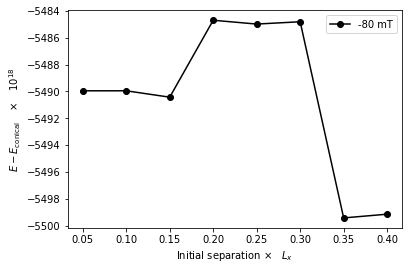

In [13]:
f, ax  = plt.subplots()

colors = plt.cm.magma(np.linspace(0, 0.7, 4))
for f, FIELD in enumerate([-0.08,]): # -0.1, -0.12, -0.14]):
# for FIELD in [-0.12]:
    ftr = np.abs(by_fields - (FIELD)) < 1e-5
    # conical_ftr = np.abs(energy_conicalbg['B_exty'] - FIELD) < 1e-5

    ax.plot(sk_seps[ftr],
            (energies[ftr]) * 1e18, 
            'o-', label=f'{FIELD * 1e3:.0f} mT', color=colors[f])
    
ax.legend()
ax.set_xlabel('Initial separation ' + r'$\times \quad L_{x}$')
ax.set_ylabel(r'$E - E_{\mathrm{conical}} \quad \times \quad 10^{18}$')

# plt.savefig('two_tubes_separation_vs_field_energies.pdf', bbox_inches='tight')

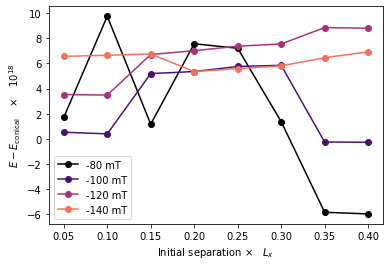

In [150]:
# f, ax  = plt.subplots()

# colors = plt.cm.magma(np.linspace(0, 0.7, 4))
# for f, FIELD in enumerate([-0.08, -0.1, -0.12, -0.14]):
# # for FIELD in [-0.12]:
#     ftr = np.abs(by_fields - (FIELD)) < 1e-5
#     conical_ftr = np.abs(energy_conicalbg['B_exty'] - FIELD) < 1e-5

#     ax.plot(sk_seps[ftr],
#             (energies[ftr] - energy_conicalbg['E_total'][conical_ftr]) * 1e18, 
#             'o-', label=f'{FIELD * 1e3:.0f} mT', color=colors[f])
    
# ax.legend()
# ax.set_xlabel('Initial separation ' + r'$\times \quad L_{x}$')
# ax.set_ylabel(r'$E - E_{\mathrm{conical}} \quad \times \quad 10^{18}$')

# # plt.savefig('two_tubes_separation_vs_field_energies.pdf', bbox_inches='tight')

## Visualization

In [14]:
import pyvista as pv

In [15]:
SNAPS_DIR = Path('two_tubes_separation_snapshots')
SNAPS_DIR.mkdir(exist_ok=True)

In [17]:
by = -80
sep = '005'

for sep in [f'{int(s):03d}' for s in range(5, 41, 5)]:
    data = op.MagnetisationData(f'../sims/mumax3/two_tubes_separation_Co8Zn9Mn3/'
                                f'two_tubes_D_0d6e-3_A_5d7295e-12_LD_120nm.out/m_tubeSep_{sep}_pLx_By_-{abs(by):06d}_mT.ovf')
    data.generate_coordinates()
    data.generate_field()

    grid = pv.RectilinearGrid(*(d * 1e9 for d in data.grid))

    grid.cell_arrays.update(dict(my=data.my))
    grid.cell_arrays.update(dict(mz=data.mz))
    grid.cell_arrays.update(dict(mx=data.mx))

    grid = grid.cell_data_to_point_data()
    grid.point_arrays.update(dict(m_vec=np.column_stack((grid.get_array('mx'),
                                                         grid.get_array('my'),
                                                         grid.get_array('mz')))))

    contours = grid.contour(scalars='my', isosurfaces=[0])

    # ------------------------------------------------------------------------------

    p = pv.Plotter(off_screen=False, notebook=True, window_size=[800, 400])

    # box = pyvista.Box([-0.03, 0.03, -0.03, 0.03, -0.03, 0.03])
    # p.add_mesh(box.outline(), color='black', opacity=1, line_width=0.6)

    # p.show_bounds(grid, color='black', location='outer', fmt='%.2f', font_family='arial')

    p.add_mesh(contours.smooth(n_iter=100), opacity=1, style='surface', scalars='my', clim=[-1, 1],
               cmap='RdBu', show_scalar_bar=False, 
               smooth_shading=True, # lighting=True, specular=0.6, specular_power=10, ambient=0.
               )
    p.add_mesh(grid.slice(normal='z'), opacity=1, style='surface', scalars='mz', cmap='magma', 
               show_scalar_bar=False, clim=[-1, 1], # scalar_bar_args=sargs
               )
    p.add_mesh(grid.outline(), opacity=1, style='surface', color='grey')

    arrows = contours.glyph(scale=False, factor=30, orient="m_vec",
                            tolerance=0.03, geom=pv.Arrow(tip_length=0.5, tip_radius=0.2)
                            )
    p.add_mesh(arrows, color='grey')

    light = pv.Light(position=(1, 0, -0.8), light_type='scene light', intensity=0.5)
    p.add_light(light)

    p.add_text(f'By = {by} mT\nInitial separation: {float(sep) * 1e-2} Lx', position='upper_left', 
               font_size=10, color='k', font='courier', 
               shadow=False, name=None, viewport=False)

    p.set_background('white')
    p.view_isometric()
    # p.camera.SetWindowCenter(0., -0.09)
    # p.camera.zoom(2.)
    # p.camera.SetParallelProjection(1)

    # p.camera.azimuth = -135
    # p.camera.roll = 180
    # p.camera.elevation = -30

    p.camera_position = 'xz'
    # p.camera.azimuth = 10
    p.camera.elevation = -65
    p.camera.zoom(1.6)

    p.add_axes(color='black', box=False, line_width=1)
    p.show(jupyter_backend='none', window_size=[600, 350], 
           screenshot=SNAPS_DIR / f'two_tubes_sk-sep_{sep}_pLx_By_-{abs(by):06d}_mT.png'
           )

In [159]:
Ac = 5.72957795e-12
Dc = 0.6e-3
Ms = 4.60545e5

LD = 4 * np.pi * (Ac) / (Dc)
BD = (Dc * Dc) / (Ac * Ms)
print(BD * 0.5)

0.06821467292679566


# Field sweep: Start at By = -100 mT

## Separation: 5% Lx

In [8]:
mz_average_up = {}

BASEDIR = Path('../sims/mumax3/two_tubes_field-sweep_Co8Zn9Mn3_NEW/')
for by in np.arange(-100, -201, -5):

    FILE = BASEDIR / f'two_tubes_field-sweep_UP_Start_By-100mT_Lx005pLx_D_0d6e-3_A_5d7295e-12_LD_120nm.out/m_By_-{abs(by):05d}_mT.ovf'
    # if not FILE.exists():
    #     continue

    data = op.MagnetisationData(FILE)
    data.generate_coordinates()
    data.generate_field()
    mz_3d = data.mz.reshape(data.nz, data.ny, data.nx)

    mz_av = np.zeros((mz_3d.shape[1], mz_3d.shape[2]))
    for z_idx in range(mz_3d.shape[0]):
        mz_av += mz_3d[z_idx, :, :]

    mz_av /= mz_3d.shape[0]

    mz_average_up[by] = mz_av

In [43]:
PLOTDIR_FS = PLOTDIR / f'two_tubes_field-sweep_UP'
PLOTDIR_FS.mkdir(exist_ok=True)
for by in np.arange(-100, -201, -5):
    np.savetxt(PLOTDIR_FS / f'm_field-sweep_By_{by:06d}.txt', mz_average_up[by])

In [45]:
mz_average_down = {}

BASEDIR = Path('../sims/mumax3/two_tubes_field-sweep_Co8Zn9Mn3_NEW/')
for by in np.arange(-100, -4, 5):

    FILE = BASEDIR / f'two_tubes_field-sweep_DOWN_Start_By-100mT_Lx005pLx_D_0d6e-3_A_5d7295e-12_LD_120nm.out/m_By_-{abs(by):05d}_mT.ovf'
    # if not FILE.exists():
    #     continue

    data = op.MagnetisationData(FILE)
    data.generate_coordinates()
    data.generate_field()
    mz_3d = data.mz.reshape(data.nz, data.ny, data.nx)

    mz_av = np.zeros((mz_3d.shape[1], mz_3d.shape[2]))
    for z_idx in range(mz_3d.shape[0]):
        mz_av += mz_3d[z_idx, :, :]

    mz_av /= mz_3d.shape[0]

    mz_average_down[by] = mz_av

In [47]:
PLOTDIR_FS = PLOTDIR / f'two_tubes_field-sweep_DOWN'
PLOTDIR_FS.mkdir(exist_ok=True)
for by in np.arange(-100, -4, 5):
    np.savetxt(PLOTDIR_FS / f'm_field-sweep_By_{by:06d}.txt', mz_average_down[by])

In [13]:
sorted(mz_average_up.keys(), reverse=True)

[-100,
 -105,
 -110,
 -115,
 -120,
 -125,
 -130,
 -135,
 -140,
 -145,
 -150,
 -155,
 -160,
 -165,
 -170,
 -175,
 -180,
 -185,
 -190,
 -195,
 -200]

In [14]:
im_tubes_args = dict(vmin=-1, vmax=1, origin='lower',
                     extent=np.array([data.xmin, data.xmax, data.ymin, data.ymax]) * 1e9)

In [24]:
PLOTDIR = Path('two_tubes_field-sweep_By')
PLOTDIR.mkdir(exist_ok=True)

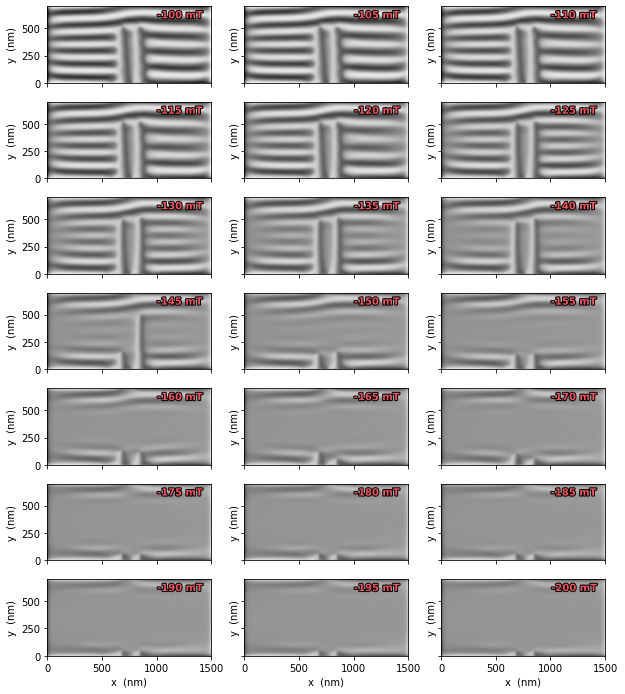

In [48]:
f, axs = plt.subplots(figsize=(10, 12), ncols=3, nrows=7, sharex=True, sharey=True)

for b, by in enumerate(np.arange(-100, -201, -5)):
    
    ax = axs.flat[b]
    ax.imshow(mz_average_up[by], cmap='Greys', **im_tubes_args)
    # axs[b][p].set_xlabel('x  (nm)')
    # axs[b][p].set_ylabel('y  (nm)')
    # axs[b][p].set_title(f'Field: {by} mT')

    t = ax.text(0.95, 0.95, f'{by} mT', ha='right', va='top',
                transform=ax.transAxes, 
                rotation=0, color='#EB5660', fontweight='bold')

    t.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])
    ax.set_ylabel('y  (nm)')

    if b >= 18:
        ax.set_xlabel('x  (nm)')

#     if b == 0:
#         magpms = PARAMS.split('_')
#         Ms = 4.60545e5
#         d = float((magpms[1]).replace('d', '.'))
#         a = float((magpms[3]).replace('d', '.'))
#         BD = (d ** 2) / (2 * Ms * a)
#         axs[b][p].set_title(f'D = {d * 1e3:.2f} mJ/m^2 \n A = {a * 1e12:.2f} pJ/m \n µ0 H_D = {BD:.4f} T')

# plt.tight_layout()
plt.savefig(PLOTDIR / f'mz_average_field-sweep_UP.png', dpi=200, bbox_inches='tight')
plt.show()

In [27]:
len(mz_average_down.keys())

17

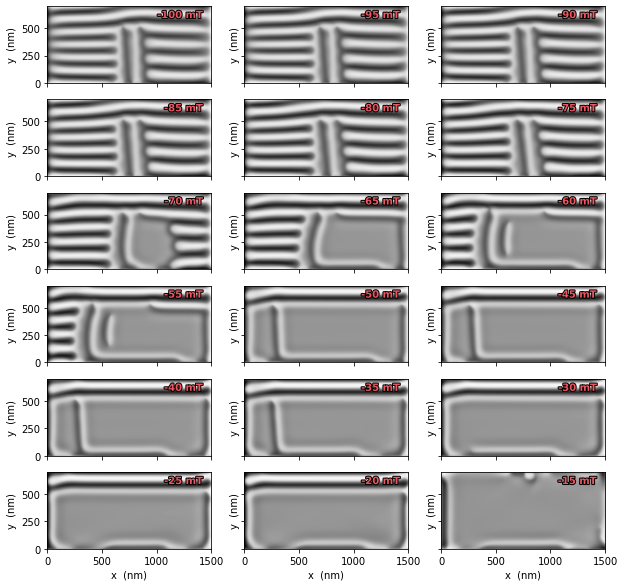

In [49]:
f, axs = plt.subplots(figsize=(10, 10), ncols=3, nrows=6, sharex=True, sharey=True)

for b, by in enumerate(np.arange(-100, -10, 5)):
    
    ax = axs.flat[b]
    ax.imshow(mz_average_down[by], cmap='Greys', **im_tubes_args)

    t = ax.text(0.95, 0.95, f'{by} mT', ha='right', va='top',
                transform=ax.transAxes, 
                rotation=0, color='#EB5660', fontweight='bold')

    t.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])
    ax.set_ylabel('y  (nm)')

    if b >= 15:
        ax.set_xlabel('x  (nm)')

#     if b == 0:
#         magpms = PARAMS.split('_')
#         Ms = 4.60545e5
#         d = float((magpms[1]).replace('d', '.'))
#         a = float((magpms[3]).replace('d', '.'))
#         BD = (d ** 2) / (2 * Ms * a)
#         axs[b][p].set_title(f'D = {d * 1e3:.2f} mJ/m^2 \n A = {a * 1e12:.2f} pJ/m \n µ0 H_D = {BD:.4f} T')

# plt.tight_layout()
plt.savefig(PLOTDIR / f'mz_average_field-sweep_DOWN.png', dpi=200, bbox_inches='tight')
plt.show()

## Separation: 20% Lx

In [8]:
mz_average_up = {}

BASEDIR = Path('../sims/mumax3/two_tubes_field-sweep_Co8Zn9Mn3_NEW/')
for by in np.arange(-100, -201, -5):

    FILE = BASEDIR / f'two_tubes_field-sweep_UP_Start_By-100mT_Lx020pLx_D_0d6e-3_A_5d7295e-12_LD_120nm.out/m_By_-{abs(by):05d}_mT.ovf'
    # if not FILE.exists():
    #     continue

    data = op.MagnetisationData(FILE)
    data.generate_coordinates()
    data.generate_field()
    mz_3d = data.mz.reshape(data.nz, data.ny, data.nx)

    mz_av = np.zeros((mz_3d.shape[1], mz_3d.shape[2]))
    for z_idx in range(mz_3d.shape[0]):
        mz_av += mz_3d[z_idx, :, :]

    mz_av /= mz_3d.shape[0]

    mz_average_up[by] = mz_av

In [10]:
PLOTDIR = Path('two_tubes_field-sweep_By')
PLOTDIR.mkdir(exist_ok=True)

In [11]:
PLOTDIR_FS = PLOTDIR / f'two_tubes_initial-sep_020pLx_field-sweep_UP'
PLOTDIR_FS.mkdir(exist_ok=True)
for by in np.arange(-100, -201, -5):
    np.savetxt(PLOTDIR_FS / f'm_field-sweep_By_{by:06d}.txt', mz_average_up[by])

In [15]:
mz_average_down = {}

BASEDIR = Path('../sims/mumax3/two_tubes_field-sweep_Co8Zn9Mn3_NEW/')
for by in np.arange(-100, -21, 5):

    FILE = BASEDIR / f'two_tubes_field-sweep_DOWN_Start_By-100mT_Lx020pLx_D_0d6e-3_A_5d7295e-12_LD_120nm.out/m_By_-{abs(by):05d}_mT.ovf'
    # if not FILE.exists():
    #     continue

    data = op.MagnetisationData(FILE)
    data.generate_coordinates()
    data.generate_field()
    mz_3d = data.mz.reshape(data.nz, data.ny, data.nx)

    mz_av = np.zeros((mz_3d.shape[1], mz_3d.shape[2]))
    for z_idx in range(mz_3d.shape[0]):
        mz_av += mz_3d[z_idx, :, :]

    mz_av /= mz_3d.shape[0]

    mz_average_down[by] = mz_av

In [16]:
PLOTDIR_FS = PLOTDIR / f'two_tubes_initial-sep_020pLxs_field-sweep_DOWN'
PLOTDIR_FS.mkdir(exist_ok=True)
for by in np.arange(-100, -21, 5):
    np.savetxt(PLOTDIR_FS / f'm_field-sweep_By_{by:06d}.txt', mz_average_down[by])

In [17]:
sorted(mz_average_up.keys(), reverse=True)

[-100,
 -105,
 -110,
 -115,
 -120,
 -125,
 -130,
 -135,
 -140,
 -145,
 -150,
 -155,
 -160,
 -165,
 -170,
 -175,
 -180,
 -185,
 -190,
 -195,
 -200]

In [18]:
im_tubes_args = dict(vmin=-1, vmax=1, origin='lower',
                     extent=np.array([data.xmin, data.xmax, data.ymin, data.ymax]) * 1e9)

In [19]:
PLOTDIR = Path('two_tubes_initial-sep_020pLx_field-sweep_By')
PLOTDIR.mkdir(exist_ok=True)

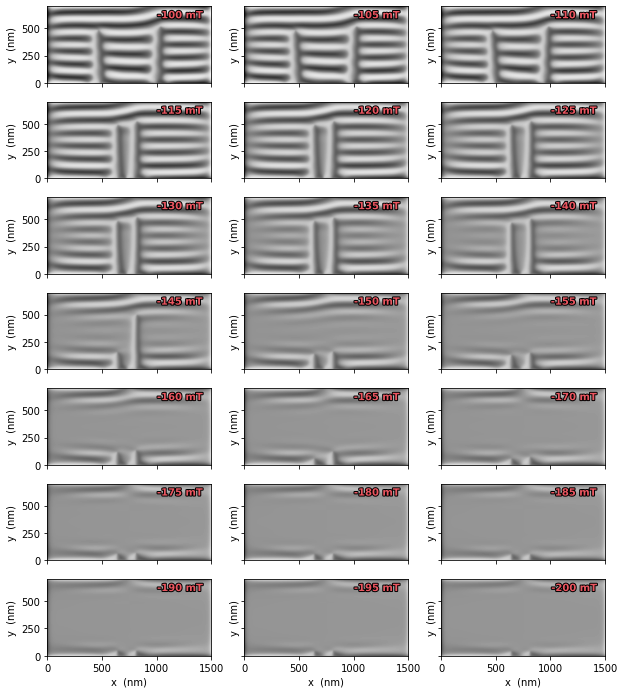

In [20]:
f, axs = plt.subplots(figsize=(10, 12), ncols=3, nrows=7, sharex=True, sharey=True)

for b, by in enumerate(np.arange(-100, -201, -5)):
    
    ax = axs.flat[b]
    ax.imshow(mz_average_up[by], cmap='Greys', **im_tubes_args)
    # axs[b][p].set_xlabel('x  (nm)')
    # axs[b][p].set_ylabel('y  (nm)')
    # axs[b][p].set_title(f'Field: {by} mT')

    t = ax.text(0.95, 0.95, f'{by} mT', ha='right', va='top',
                transform=ax.transAxes, 
                rotation=0, color='#EB5660', fontweight='bold')

    t.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])
    ax.set_ylabel('y  (nm)')

    if b >= 18:
        ax.set_xlabel('x  (nm)')

#     if b == 0:
#         magpms = PARAMS.split('_')
#         Ms = 4.60545e5
#         d = float((magpms[1]).replace('d', '.'))
#         a = float((magpms[3]).replace('d', '.'))
#         BD = (d ** 2) / (2 * Ms * a)
#         axs[b][p].set_title(f'D = {d * 1e3:.2f} mJ/m^2 \n A = {a * 1e12:.2f} pJ/m \n µ0 H_D = {BD:.4f} T')

# plt.tight_layout()
plt.savefig(PLOTDIR / f'mz_average_field-sweep_UP.png', dpi=200, bbox_inches='tight')
plt.show()

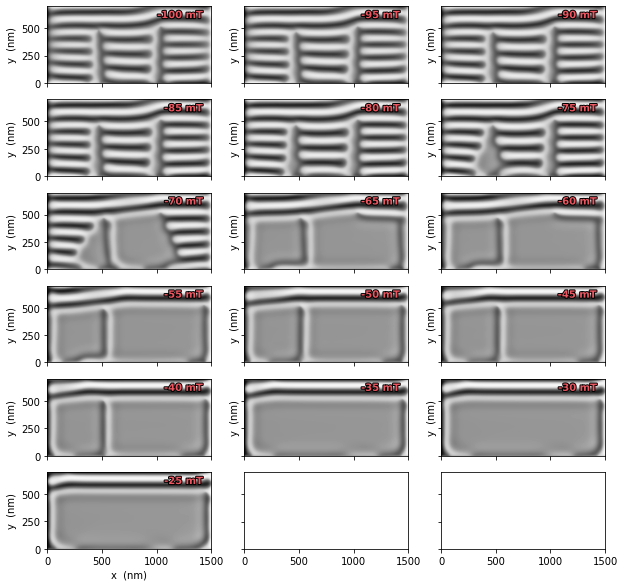

In [22]:
f, axs = plt.subplots(figsize=(10, 10), ncols=3, nrows=6, sharex=True, sharey=True)

for b, by in enumerate(np.arange(-100, -21, 5)):
    
    ax = axs.flat[b]
    ax.imshow(mz_average_down[by], cmap='Greys', **im_tubes_args)

    t = ax.text(0.95, 0.95, f'{by} mT', ha='right', va='top',
                transform=ax.transAxes, 
                rotation=0, color='#EB5660', fontweight='bold')

    t.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='k')])
    ax.set_ylabel('y  (nm)')

    if b >= 15:
        ax.set_xlabel('x  (nm)')

#     if b == 0:
#         magpms = PARAMS.split('_')
#         Ms = 4.60545e5
#         d = float((magpms[1]).replace('d', '.'))
#         a = float((magpms[3]).replace('d', '.'))
#         BD = (d ** 2) / (2 * Ms * a)
#         axs[b][p].set_title(f'D = {d * 1e3:.2f} mJ/m^2 \n A = {a * 1e12:.2f} pJ/m \n µ0 H_D = {BD:.4f} T')

# plt.tight_layout()
plt.savefig(PLOTDIR / f'mz_average_field-sweep_DOWN.png', dpi=200, bbox_inches='tight')
plt.show()